In [1]:
!pip install keras

In [2]:
!pip install tensorflow

In [3]:
!pip install shap

In [4]:
#Importing required libraries for applying traditional machine learning and deep learning with attention mechanism on datasets 1&2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder,MinMaxScaler   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### 3.2 Data collection:

In [5]:
#Loading the csv data - 'Complete Data.csv' using pandas library and printing the first 10 rows from pandas dataframe
patients_data = pd.read_csv('Complete Data.csv')      #loading csv data to 'patients_data' df
patients_data.head(10)                                #printing first 10 rows from 'patients_data' df

,StudyID,patientiseligibleforenrollment,Sitecode,Gender,Age,GlycosylatedhemoglobinHbA1c,Patientuncontrolledonmetforminandlifestylemodificationfor,Patientswithtype1diabetes,≥1episodesofdiabeticketoacidosisandorhyperosmolarhyper,≥1episodesofseverehypoglycaemiainthepreceding03months,...,NEVER,EX,HYPOGLYCEMIA_YES,NAUSEA_YES,VOMITING_YES,DIARRHEA_YES,ABDOMINAL_YES,FLATULENCE_YES,ASTHENIA_YES,INDEIGESTION_YES
0,01_001,YES,1,male,62,9.1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
1,01_002,YES,1,female,62,7.6,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
2,01_003,YES,1,female,47,7.1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
3,01_004,YES,1,female,50,9.2,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
4,01_005,YES,1,male,55,7.3,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
5,01_006,YES,1,male,62,7.0,Yes,No,No,No,...,0,1,0,0,0,0,0,0,0,0
6,01_007,YES,1,male,38,7.1,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
7,01_008,YES,1,male,54,9.2,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
8,01_009,YES,1,male,55,8.6,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0
9,02_002,YES,2,female,65,7.2,Yes,No,No,No,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Finding the no.of rows and columns present in patients_data dataframe
print(patients_data.shape)

(240, 207)


In [7]:
#Displaying information about patients_data df
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 207 entries, StudyID to INDEIGESTION_YES
dtypes: float64(75), int64(48), object(84)
memory usage: 388.3+ KB


#### 3.2.2 Data Preprocessing techniques:

In [8]:
#Dropping the columns which has either zero or 1 value in the entire column

cols_before_drop = patients_data.columns.tolist()  #storing all columns from patients_data dataframe before dropping

#dropping columns with has less than or equal to one value in the entire column
for column in patients_data.columns:
    if patients_data[column].count() <= 1:
        patients_data.drop(column, axis=1, inplace=True)

#identifying dropped columns and printing them
dropped_columns = [col for col in cols_before_drop if col not in patients_data.columns]
print("Dropped columns:", dropped_columns)

Dropped columns: ['Pleasespecifythereasonforineligibility', 'Otheradverseeventspleasespecify', 'Pleaseelaboratewhythepatientwantstodiscontinue', 'Otheradverseeventspleasespecify_A', 'Pleaseelaboratewhythepatientwantstodiscontinue_A', 'Otheradverseeventspleasespecify_B']


In [9]:
#Finding the shape of dataframe - patients_data after dropping the unnecessary columns
print(patients_data.shape)

(240, 201)


In [10]:
#Finding the sum of missing values of the columns with datatypes

missing_values = patients_data.isnull().sum()         #summing the no.of null values present for each column

missing_cols = missing_values[missing_values > 0]     #filtering columns with missing values
missing_dtypes = patients_data[missing_cols.index].dtypes   #getting the datatypes of columns with missing values

#concatenating the above two variables into a new dataFrame- "missing_info"
missing_info = pd.concat([missing_cols, missing_dtypes], axis=1)
missing_info.columns = ['Missing Values', 'Data Type']            #setting the column names for missing_info df

pd.set_option('display.max_rows', None)   #displays all rows and columns in the dataframe- missing_info
print("Columns with missing values, their respective counts, and data types:")
missing_info

Columns with missing values, their respective counts, and data types:


,Missing Values,Data Type
Pregnantorlactatingwomen,118,object
Patientinitials_A,3,object
Incomegroup,1,object
SmokingTobaccousestatus,100,object
Othercomorbidconditionspleasespecify,234,object
Dose_A,217,object
Sitecode_B,32,float64
DateofVisit1,32,object
Weightonvisit1,32,float64
Systolicbloodpressure_A,32,float64


##### Handling missing values for numerical data

In [11]:
#Filling the missing values with the mean value of that respective columns where dtype= 'float'
float_cols = patients_data.select_dtypes(include='float64').columns   #filtering the columns with 'dtype=float' 

#filling the empty values with mean value of that respective column and printing them
patients_data[float_cols] = patients_data[float_cols].fillna(patients_data[float_cols].mean())  
patients_data[float_cols]   

,GlycosylatedhemoglobinHbA1c,BMI,GlycosylatedHemoglobinHbA1c_baseline,Sitecode_B,Weightonvisit1,Systolicbloodpressure_A,DiastolicBloodPressure_A,FastingPlasmaGlucose_A,OtheradverseEvents,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma,...,dqol_t4,satisfaction_2,Impact_2,worry_2,satisfaction_3,impact_3,worry_3,satisfaction_4,impact_4,worry_4
0,9.1,31.1,9.1,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
1,7.6,21.6,7.6,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
2,7.1,23.7,7.1,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
3,9.2,20.0,9.2,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
4,7.3,20.3,7.3,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
5,7.0,32.6,7.0,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
6,7.1,42.9,7.1,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
7,9.2,24.4,9.2,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
8,8.6,33.6,8.6,6.288462,75.120192,126.043269,80.591346,128.221154,2.0,2.663462,...,21.87234,13.562771,9.112554,6.666667,11.233766,7.480519,5.515152,9.419913,6.233766,4.640693
9,7.2,19.1,7.2,2.000000,48.000000,130.000000,80.000000,193.000000,2.0,3.000000,...,3.00000,15.000000,9.000000,9.000000,15.000000,9.000000,9.000000,15.000000,8.000000,7.000000


##### Handling missing values for categorical data

In [12]:
#Filling the missing values with the mode of that respective columns where dtype= 'object'
object_cols = patients_data.select_dtypes(include=['object']).columns   #filtering categorical columns from patients_data

#filling the empty values with mode of that respective column and printing them
patients_data[object_cols] = patients_data[object_cols].fillna(patients_data[object_cols].mode().iloc[0])
pd.set_option('display.max_columns', None)
patients_data[object_cols]

,StudyID,patientiseligibleforenrollment,Gender,Patientuncontrolledonmetforminandlifestylemodificationfor,Patientswithtype1diabetes,≥1episodesofdiabeticketoacidosisandorhyperosmolarhyper,≥1episodesofseverehypoglycaemiainthepreceding03months,Pregnantorlactatingwomen,Historyofpancreatitisinthepreceding12months,Anycontraindicationincludingsevererenalimpairmenthypersen,Anyotherclinicalconditionthatwouldjeopardizepatientssaf,Complete,Dateofenrollment,Patientinitials_A,MaritalStatus,Educationlevel,Incomegroup,SmokingTobaccousestatus,Hypertension,Dyslipidemia,IschemicHeartDisease,ChronicKidneydisease,OtherComorbidities,Othercomorbidconditionspleasespecify,Dosage,Frequency,Formulationnbsp,Dose,Dose_A,Frequency_A,Complete_A,DateofVisit1,Hypoglycemia,Nausea,Vomiting,Diarrhea,Abdominaldiscomfort,Flatulence,Asthenia,Indigestion,DidthepatientexperienceanyseriousadverseeventSAEwhile,AdverseEventReportedTabforPValerts,Isthereanyadjustmentinthestudytreatmentdose,ChangeinStudytreatmentSitagliptinMetforminDosageForm,ChangeinStudytreatmentSitagliptinMetforminDosage,ChangeinStudytreatmentSitagliptinMetforminFrequency,Patientiswillingtocontinueinthestudy,Complete_B,Dateofvisit2,Hypoglycemia_A,Nausea_A,Vomiting_A,Diarrhea_A,Abdominaldiscomfort_A,Flatulence_A,Asthenia_A,Indigestion_A,OtherAdverseEvents_A,DidthepatientexperienceanyseriousadverseeventSAEwhile_A,AdverseEventReportedTabforPValerts_A,Isthereanyadjustmentinthestudytreatmentdose_A,ChangeinStudytreatmentSitagliptinMetforminDosageForm_A,ChangeinStudytreatmentSitagliptinMetforminDosage_A,ChangeinStudytreatmentSitagliptinMetforminFrequency_A,Patientiswillingtocontinueinthestudy_A,Complete_C,Dateofvisit3,Hypoglycemia_B,Nausea_B,Vomiting_B,Diarrhea_B,Abdominaldiscomfort_B,Flatulence_B,Asthenia_B,Indigestion_B,OtherAdverseEvents_B,DidthepatientexperienceanyseriousadverseeventSAEwhile_B,AdverseEventReportedTabforPValerts_B,Patienthascompletedallstudyvisits,Complete_D,filter_$
0,01_001,YES,male,Yes,No,No,No,No,No,No,No,Complete,9-Dec-20,AH,Married,Secondary or below,"Middle income group (19,000 - 67,000/month)",Ex-smoker (discontinued ≥ 1 year),No,Yes,No,No,No,Thyroid disease,500 mg,BD,Plain,50 mg /500 mg,50 mg + 1000 mg,BD,Complete,6-Mar-21,no,no,no,no,no,no,no,no,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,21-Oct-21,0,no,no,no,no,no,0,0,No,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,18-Sep-21,no,no,no,no,no,no,no,no,No,No,No,Yes,Complete,Selected
1,01_002,YES,female,Yes,No,No,No,No,No,No,No,Complete,15-Dec-20,NG,Married,Secondary or below,"Middle income group (19,000 - 67,000/month)",Ex-smoker (discontinued ≥ 1 year),Yes,Yes,No,No,No,Thyroid disease,500 mg,BD,Plain,50 mg /500 mg,50 mg + 1000 mg,BD,Complete,6-Mar-21,no,no,no,no,no,no,no,no,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,21-Oct-21,0,no,no,no,no,no,0,0,No,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,18-Sep-21,no,no,no,no,no,no,no,no,No,No,No,Yes,Complete,Selected
2,01_003,YES,female,Yes,No,No,No,No,No,No,No,Complete,24-Dec-20,ZQ,single,Graduate or above,"Middle income group (19,000 - 67,000/month)",Ex-smoker (discontinued ≥ 1 year),Yes,Yes,No,No,No,Thyroid disease,500 mg,BD,Plain,50 mg /500 mg,50 mg + 1000 mg,TDS,Complete,6-Mar-21,no,no,no,no,no,no,no,no,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,21-Oct-21,0,no,no,no,no,no,0,0,No,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,18-Sep-21,no,no,no,no,no,no,no,no,No,No,No,Yes,Complete,Selected
3,01_004,YES,female,Yes,No,No,No,No,No,No,No,Complete,24-Dec-20,SH,Married,Graduate or above,"Middle income group (19,000 - 67,000/month)",Ex-smoker (discontinued ≥ 1 year),No,No,No,No,No,Thyroid disease,500 mg,BD,Plain,50 mg /500 mg,50 mg + 1000 mg,BD,Complete,6-Mar-21,no,no,no,no,no,no,no,no,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,21-Oct-21,0,no,no,no,no,no,0,0,No,No,No,No,Plain,50mg /1000mg,BD,Yes,Complete,18-Sep-21,no,no,no,no,no,no,no,no,No,No,No,Yes,Complete,Selected
4,01_005,YES,male,Yes,No,No,No,No,No,No,No,Complete,30-Dec-20,MZ,Married,Secondary or below,"Middle income group (19,000 - 67,000/

In [13]:
#Checking for if any missing values present in the dataframe- patients_data after filling
missing_values_after_filling = patients_data.isnull().sum()

print("Missing values after filling:")     #printing missing values after filling 
missing_values_after_filling

Missing values after filling:


StudyID                                                      0
patientiseligibleforenrollment                               0
Sitecode                                                     0
Gender                                                       0
Age                                                          0
GlycosylatedhemoglobinHbA1c                                  0
Patientuncontrolledonmetforminandlifestylemodificationfor    0
Patientswithtype1diabetes                                    0
≥1episodesofdiabeticketoacidosisandorhyperosmolarhyper       0
≥1episodesofseverehypoglycaemiainthepreceding03months        0
Pregnantorlactatingwomen                                     0
Historyofpancreatitisinthepreceding12months                  0
Anycontraindicationincludingsevererenalimpairmenthypersen    0
Anyotherclinicalconditionthatwouldjeopardizepatientssaf      0
Complete                                                     0
SiteCode_A                                             

##### Converting categorical data into numeric data

In [14]:
#Performing lebel encoding on each categorical column to convert into numeric data value

#Initializing LabelEncoder
encoder = LabelEncoder()

#Looping through all columns in the dataset
for column in patients_data.columns:
    if patients_data[column].dtype == 'object':     # checking if the column is categorical or not 
        patients_data[column] = encoder.fit_transform(patients_data[column])  #using LabelEncoder to convert the categorical column to numeric value

patients_data.head()          #displaying the first 5 rows of updated dataset

,StudyID,patientiseligibleforenrollment,Sitecode,Gender,Age,GlycosylatedhemoglobinHbA1c,Patientuncontrolledonmetforminandlifestylemodificationfor,Patientswithtype1diabetes,≥1episodesofdiabeticketoacidosisandorhyperosmolarhyper,≥1episodesofseverehypoglycaemiainthepreceding03months,Pregnantorlactatingwomen,Historyofpancreatitisinthepreceding12months,Anycontraindicationincludingsevererenalimpairmenthypersen,Anyotherclinicalconditionthatwouldjeopardizepatientssaf,Complete,SiteCode_A,Dateofenrollment,Patientinitials_A,Weight,Height,BMI,MaritalStatus,Educationlevel,Incomegroup,Numberofdependents,SmokingTobaccousestatus,DurationofDiabetes,Systolicbloodpressure,DiastolicBloodpressure,Hypertension,Dyslipidemia,IschemicHeartDisease,ChronicKidneydisease,OtherComorbidities,Othercomorbidconditionspleasespecify,GlycosylatedHemoglobinHbA1c_baseline,Fastingplasmaglucose,Dosage,Frequency,Formulationnbsp,Dose,Dose_A,Frequency_A,@1Howsatisﬁedareyouwiththeamountoftimeittakestoman,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo,@4Howsatisﬁedareyouwithyourcurrenttreatment,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete,@6Howsatisﬁedareyouwithlifeingeneral,@7Howoftendoyoufeelpainassociatedwiththetreatmentfory,@8Howoftendoyoufeelphysicallyill,@9Howoftendoesyourdiabetesinterferewithyourfamilylife,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre,@11Howoftendoyouworryaboutwhetheryouwillpassout,@12.Howoftendoyouworrythatyourbodylooksdiﬀerentbecau,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom,Complete_A,Sitecode_B,DateofVisit1,Weightonvisit1,Systolicbloodpressure_A,DiastolicBloodPressure_A,FastingPlasmaGlucose_A,Hypoglycemia,Nausea,Vomiting,Diarrhea,Abdominaldiscomfort,Flatulence,Asthenia,Indigestion,OtheradverseEvents,DidthepatientexperienceanyseriousadverseeventSAEwhile,AdverseEventReportedTabforPValerts,Isthereanyadjustmentinthestudytreatmentdose,ChangeinStudytreatmentSitagliptinMetforminDosageForm,ChangeinStudytreatmentSitagliptinMetforminDosage,ChangeinStudytreatmentSitagliptinMetforminFrequency,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett_A,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo_A,@4Howsatisﬁedareyouwithyourcurrenttreatment_A,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete_A,@6Howsatisﬁedareyouwithlifeingeneral_A,@7Howoftendoyoufeelpainassociatedwiththetreatmentfor,@8Howoftendoyoufeelphysicallyill_A,@9Howoftendoesyourdiabetesinterferewithyourfamilylife_A,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre_A,@11Howoftendoyouworryaboutwhetheryouwillpassout_A,@12Howoftendoyouworrythatyourbodylooksdiﬀerentbecau,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom_A,Patientiswillingtocontinueinthestudy,Complete_B,Sitecode_C,Dateofvisit2,Weightonvisit2,Systolicbloodpressure_B,DiastolicBloodPressure_B,GlycosylatedHemoglobinHbA1c_B,FastingPlasmaGlucose_B,Hypoglycemia_A,Nausea_A,Vomiting_A,Diarrhea_A,Abdominaldiscomfort_A,Flatulence_A,Asthenia_A,Indigestion_A,OtherAdverseEvents_A,DidthepatientexperienceanyseriousadverseeventSAEwhile_A,AdverseEventReportedTabforPValerts_A,Isthereanyadjustmentinthestudytreatmentdose_A,ChangeinStudytreatmentSitagliptinMetforminDosageForm_A,ChangeinStudytreatmentSitagliptinMetforminDosage_A,ChangeinStudytreatmentSitagliptinMetforminFrequency_A,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma_A,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett_B,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo_B,@4Howsatisﬁedareyouwithyourcurrenttreatment_B,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete_B,@6Howsatisﬁedareyouwithlifeingeneral_B,@7Howoftendoyoufeelpainassociatedwiththetreatmentfor_A,@8Howoftendoyoufeelphysicallyill_B,@9Howoftendoesyourdiabetesinterferewithyourfamilylife_B,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre_B,@11Howoftendoyouworryaboutwhetheryouwillpassout_B,@12Howoftendoyouworrythatyourbodylooksdiﬀerentbecau_A,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom_

In [15]:
#Checking if any categorical values are present or not in the dataframe- patients_data after performing Label encoding
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 201 entries, StudyID to INDEIGESTION_YES
dtypes: float64(72), int32(81), int64(48)
memory usage: 301.1 KB


##### Performing Normalization

In [16]:
#Performing normalization on patients_data dataframe to get to standard scale of 0 to 1

numeric_cols = patients_data.select_dtypes(include=['float64', 'int64']).columns  #selecting numeric columns from patients_data df

#Initializing MinMaxScaler() and applying to numeric_cols to perform normalization
scaler = MinMaxScaler()    #initializing 'MinMaxScaler' to perform normalization
ptsdata_normalized = scaler.fit_transform(patients_data[numeric_cols])  #applying normalization to selected numeric columns
ptsdata_normalized = pd.DataFrame(ptsdata_normalized, columns=numeric_cols)  #converting normalized array back to a DataFrame

#Using above defined 'object_cols' variable and concatenating  with normalized numeric columns 
ptsdata_normalized = pd.concat([ptsdata_normalized, patients_data[object_cols]], axis=1)
ptsdata_normalized.head()          #printing first 5 rows of normalized dataframe

,Sitecode,Age,GlycosylatedhemoglobinHbA1c,SiteCode_A,Weight,Height,BMI,Numberofdependents,DurationofDiabetes,Systolicbloodpressure,DiastolicBloodpressure,GlycosylatedHemoglobinHbA1c_baseline,Fastingplasmaglucose,@1Howsatisﬁedareyouwiththeamountoftimeittakestoman,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo,@4Howsatisﬁedareyouwithyourcurrenttreatment,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete,@6Howsatisﬁedareyouwithlifeingeneral,@7Howoftendoyoufeelpainassociatedwiththetreatmentfory,@8Howoftendoyoufeelphysicallyill,@9Howoftendoesyourdiabetesinterferewithyourfamilylife,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre,@11Howoftendoyouworryaboutwhetheryouwillpassout,@12.Howoftendoyouworrythatyourbodylooksdiﬀerentbecau,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom,Sitecode_B,Weightonvisit1,Systolicbloodpressure_A,DiastolicBloodPressure_A,FastingPlasmaGlucose_A,OtheradverseEvents,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett_A,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo_A,@4Howsatisﬁedareyouwithyourcurrenttreatment_A,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete_A,@6Howsatisﬁedareyouwithlifeingeneral_A,@7Howoftendoyoufeelpainassociatedwiththetreatmentfor,@8Howoftendoyoufeelphysicallyill_A,@9Howoftendoesyourdiabetesinterferewithyourfamilylife_A,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre_A,@11Howoftendoyouworryaboutwhetheryouwillpassout_A,@12Howoftendoyouworrythatyourbodylooksdiﬀerentbecau,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom_A,Sitecode_C,Weightonvisit2,Systolicbloodpressure_B,DiastolicBloodPressure_B,GlycosylatedHemoglobinHbA1c_B,FastingPlasmaGlucose_B,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma_A,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett_B,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo_B,@4Howsatisﬁedareyouwithyourcurrenttreatment_B,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete_B,@6Howsatisﬁedareyouwithlifeingeneral_B,@7Howoftendoyoufeelpainassociatedwiththetreatmentfor_A,@8Howoftendoyoufeelphysicallyill_B,@9Howoftendoesyourdiabetesinterferewithyourfamilylife_B,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre_B,@11Howoftendoyouworryaboutwhetheryouwillpassout_B,@12Howoftendoyouworrythatyourbodylooksdiﬀerentbecau_A,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom_B,Sitecode_fup3,Weightonvisit3,Systolicbloodpressure_C,DiastolicBloodPressure_C,FastingPlasmaGlucose_C,GlycosylatedHemoglobinHbA1c_C,@1Howsatisﬁedareyouwiththeamountoftimeittakestoma_B,@2Howsatisﬁedareyouwiththeamountoftimeyouspendgett_C,@3Howsatisﬁedareyouwiththetimeittakestodetermineyo_C,@4Howsatisﬁedareyouwithyourcurrenttreatment_C,@5Howsatisﬁedareyouwithyourknowledgeaboutyourdiabete_C,@6Howsatisﬁedareyouwithlifeingeneral_C,@7Howoftendoyoufeelpainassociatedwiththetreatmentfor_B,@8Howoftendoyoufeelphysicallyill_C,@9Howoftendoesyourdiabetesinterferewithyourfamilylife_C,@10Howoftendoyouﬁndyourdiabeteslimitingyoursocialre_C,@11Howoftendoyouworryaboutwhetheryouwillpassout_C,@12Howoftendoyouworrythatyourbodylooksdiﬀerentbecau_B,@13Howoftendoyourworrythatyouwillgetcomplicationsfrom_C,satisfaction_1,impact_1,worry_1,dqol_t1,dqol_t2,dqol_t3,dqol_t4,satisfaction_2,Impact_2,worry_2,satisfaction_3,impact_3,worry_3,satisfaction_4,impact_4,worry_4,male,female,Married,single,secondary_below,Graduate_above,uneducated,L_I,M_I,U_I,CURRENT,NEVER,EX,HYPOGLYCEMIA_YES,NAUSEA_YES,VOMITING_YES,DIARRHEA_YES,ABDOMINAL_YES,FLATULENCE_YES,ASTHENIA_YES,INDEIGESTION_YES,StudyID,patientiseligibleforenrollment,Gender,Patientuncontrolledonmetforminandlifestylemodificationfor,Patientswithtype1diabetes,≥1episodesofdiabeticketoacidosisandorhyperosmolarhyper,≥1episodesofseverehypoglycaemiainthepreceding03months,Pregnantorlactatingwomen,Historyofpancreatitisinthepreceding12months,Anycontraindicationincludingsevererenalimpairmenthypersen,Anyotherclinicalconditionthatwouldjeopardizepatientssaf,Complete,Dateofe

In [17]:
#Checking the information of dataset after performing normalization on 'ptsdata_normalized' df
ptsdata_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Columns: 201 entries, Sitecode to filter_$
dtypes: float64(120), int32(81)
memory usage: 301.1 KB


### 3.3 Feature Selection and Engineering

#### 3.3.1 Identification of relevant features

##### Data exploring

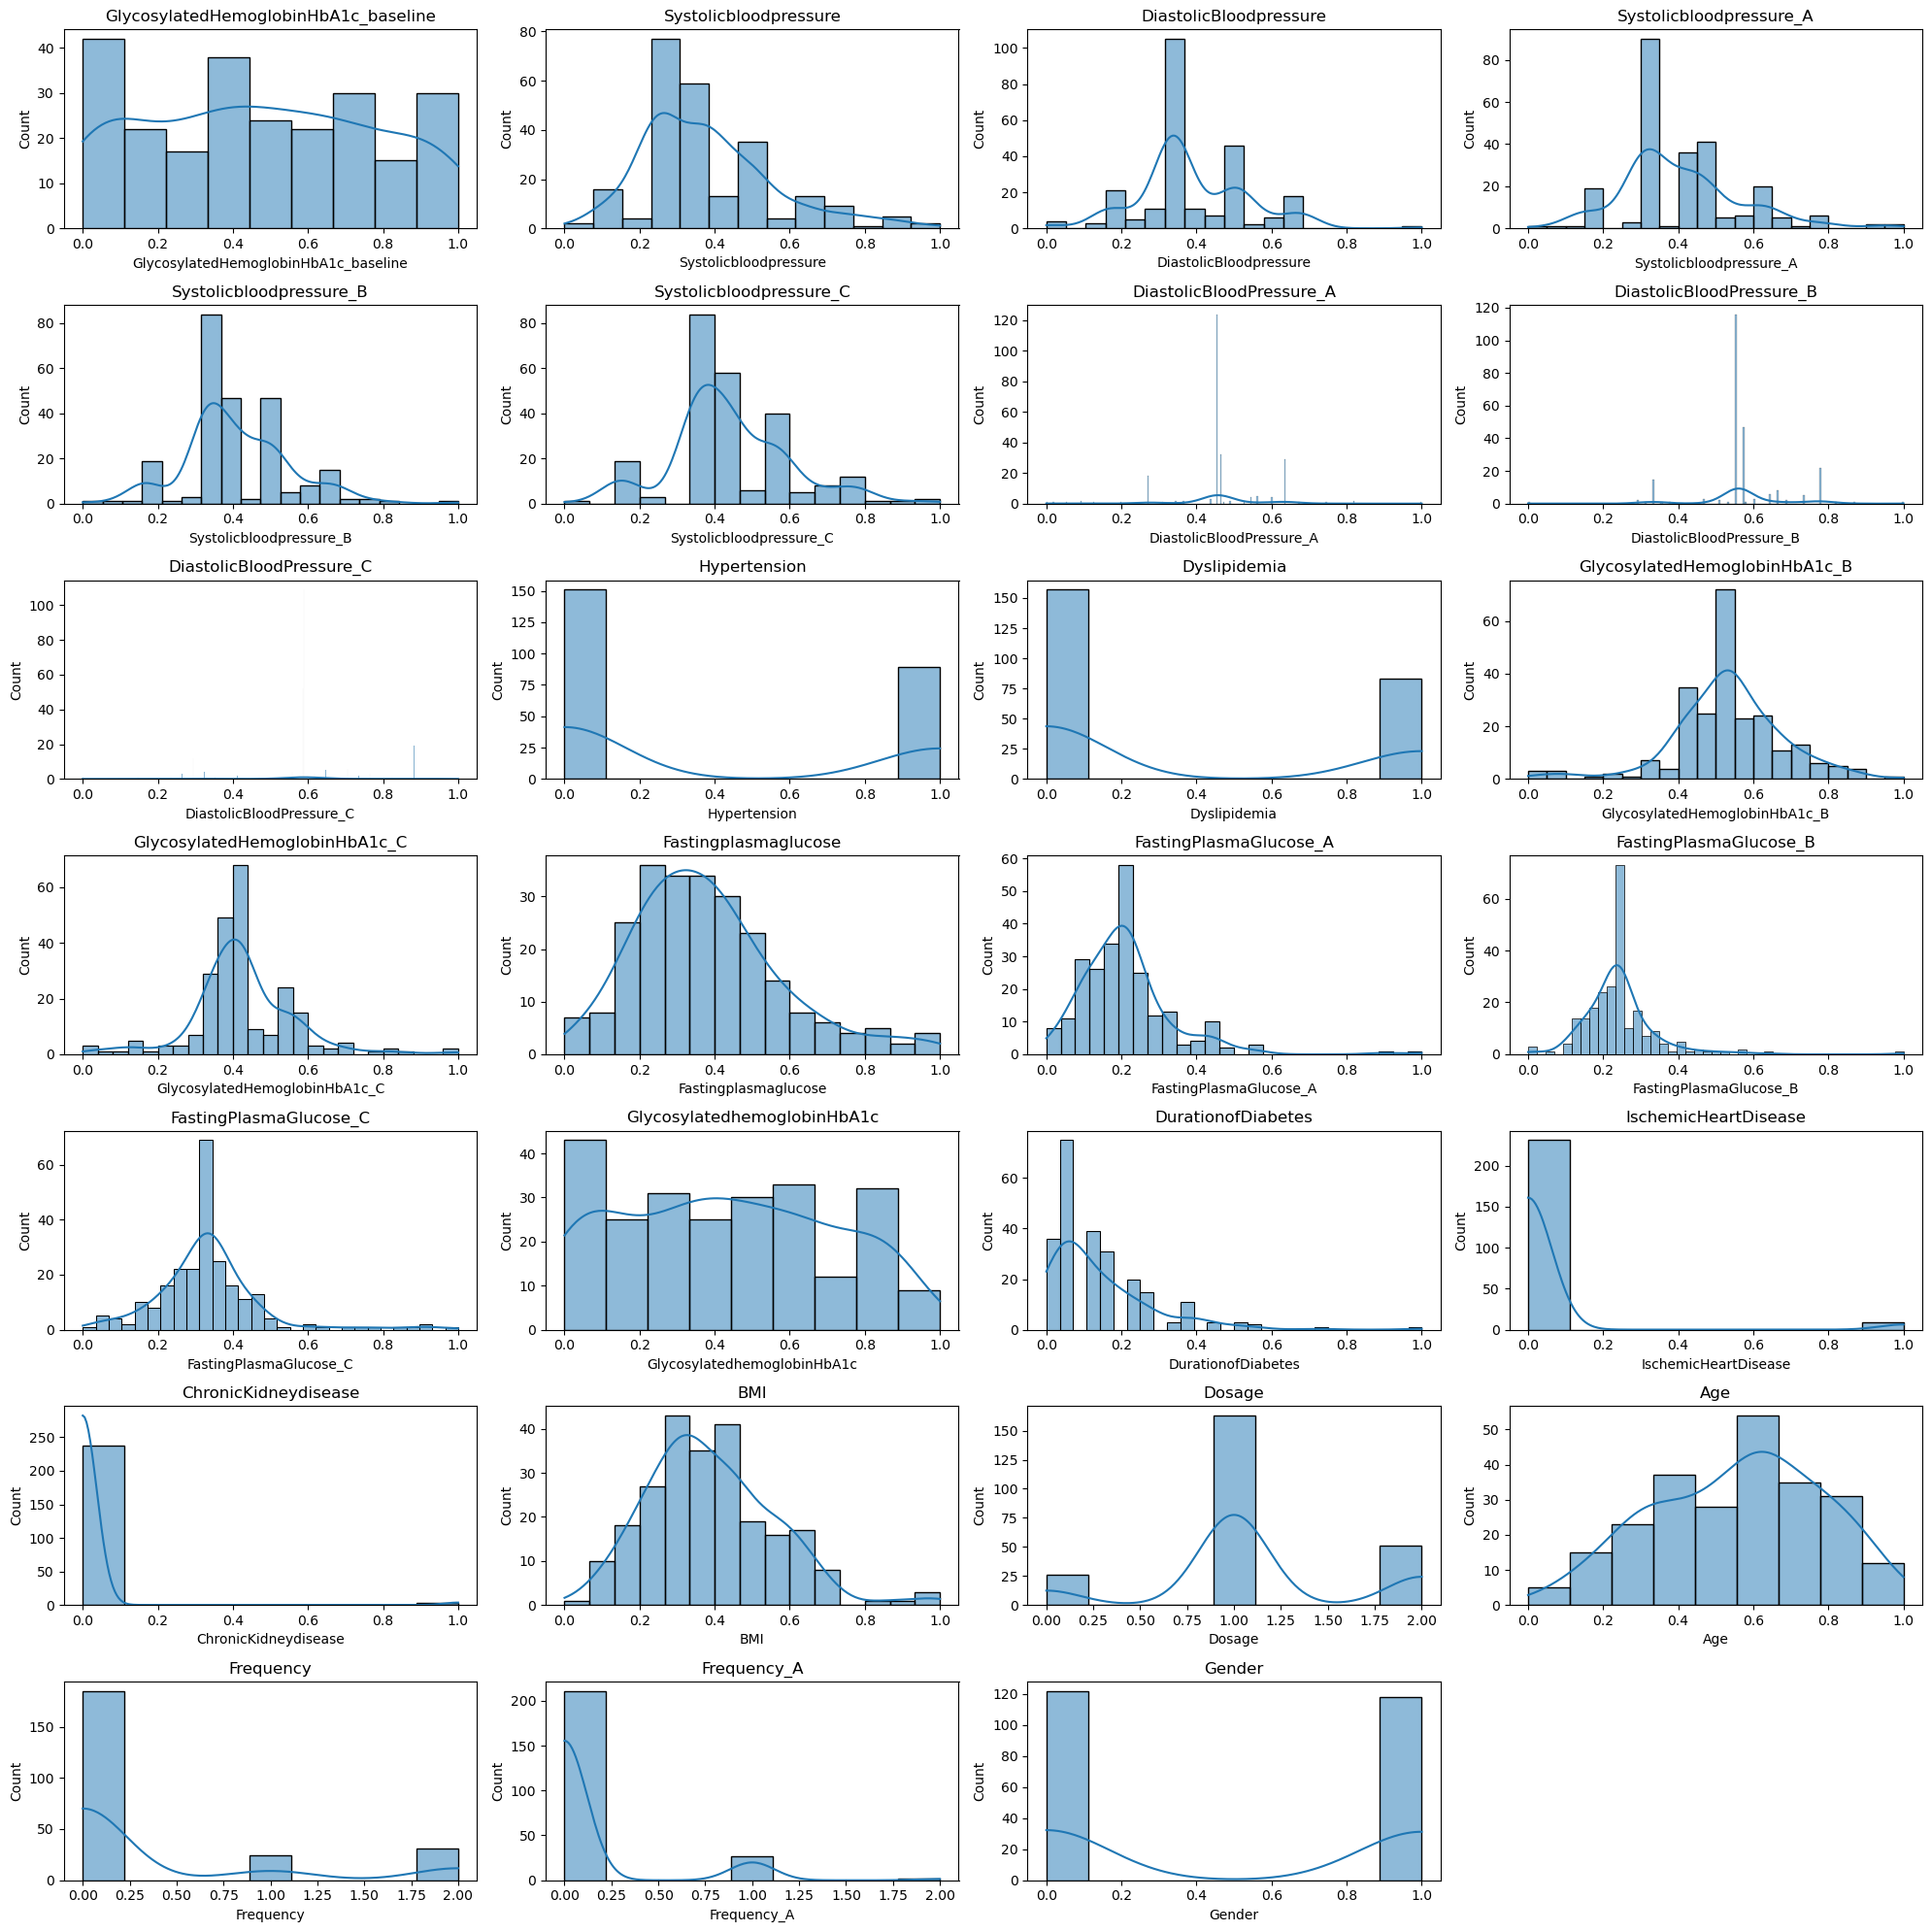

In [18]:
#Selecting suitable columns from ptsdata_normalized df to evaluate model performances and displaying the data distribution

selected_columns = ['GlycosylatedHemoglobinHbA1c_baseline','Systolicbloodpressure', 'DiastolicBloodpressure','Systolicbloodpressure_A', 'Systolicbloodpressure_B', 'Systolicbloodpressure_C', 'DiastolicBloodPressure_A', 'DiastolicBloodPressure_B', 'DiastolicBloodPressure_C', 'Hypertension', 'Dyslipidemia', 'GlycosylatedHemoglobinHbA1c_B', 'GlycosylatedHemoglobinHbA1c_C', 'Fastingplasmaglucose', 'FastingPlasmaGlucose_A', 'FastingPlasmaGlucose_B', 'FastingPlasmaGlucose_C', 'GlycosylatedhemoglobinHbA1c', 'DurationofDiabetes', 'IschemicHeartDisease', 'ChronicKidneydisease', 'BMI', 'Dosage', 'Age', 'Frequency', 'Frequency_A', 'Gender']

#filtering the ptsdata_normalized df to select only the 'selected_columns' and assigning them to selected_data 
selected_data = ptsdata_normalized[selected_columns]   

#defining the number of rows and columns for subplots
num_cols = 4
num_rows = (len(selected_data.columns) - 1) // num_cols + 1

#creating subplots for displaying the data distribution of selected_columns
plt.figure(figsize=(20, 20))                              #setting the figure size for the plot 
for i, column in enumerate(selected_data.columns, 1):     #Iterating through each column in the selected_data df
    plt.subplot(num_rows, num_cols, i)                    #creating subplots for each column
    sns.histplot(selected_data[column], kde=True)         #creating histograms for the current column using seaborn library
    plt.title(column)                                     #setting the title of each subplot to the column name
  
plt.tight_layout()            #adjusting layout to prevent overlapping of subplots
plt.show()                    #displaying the subplots

##### Correlation Analysis

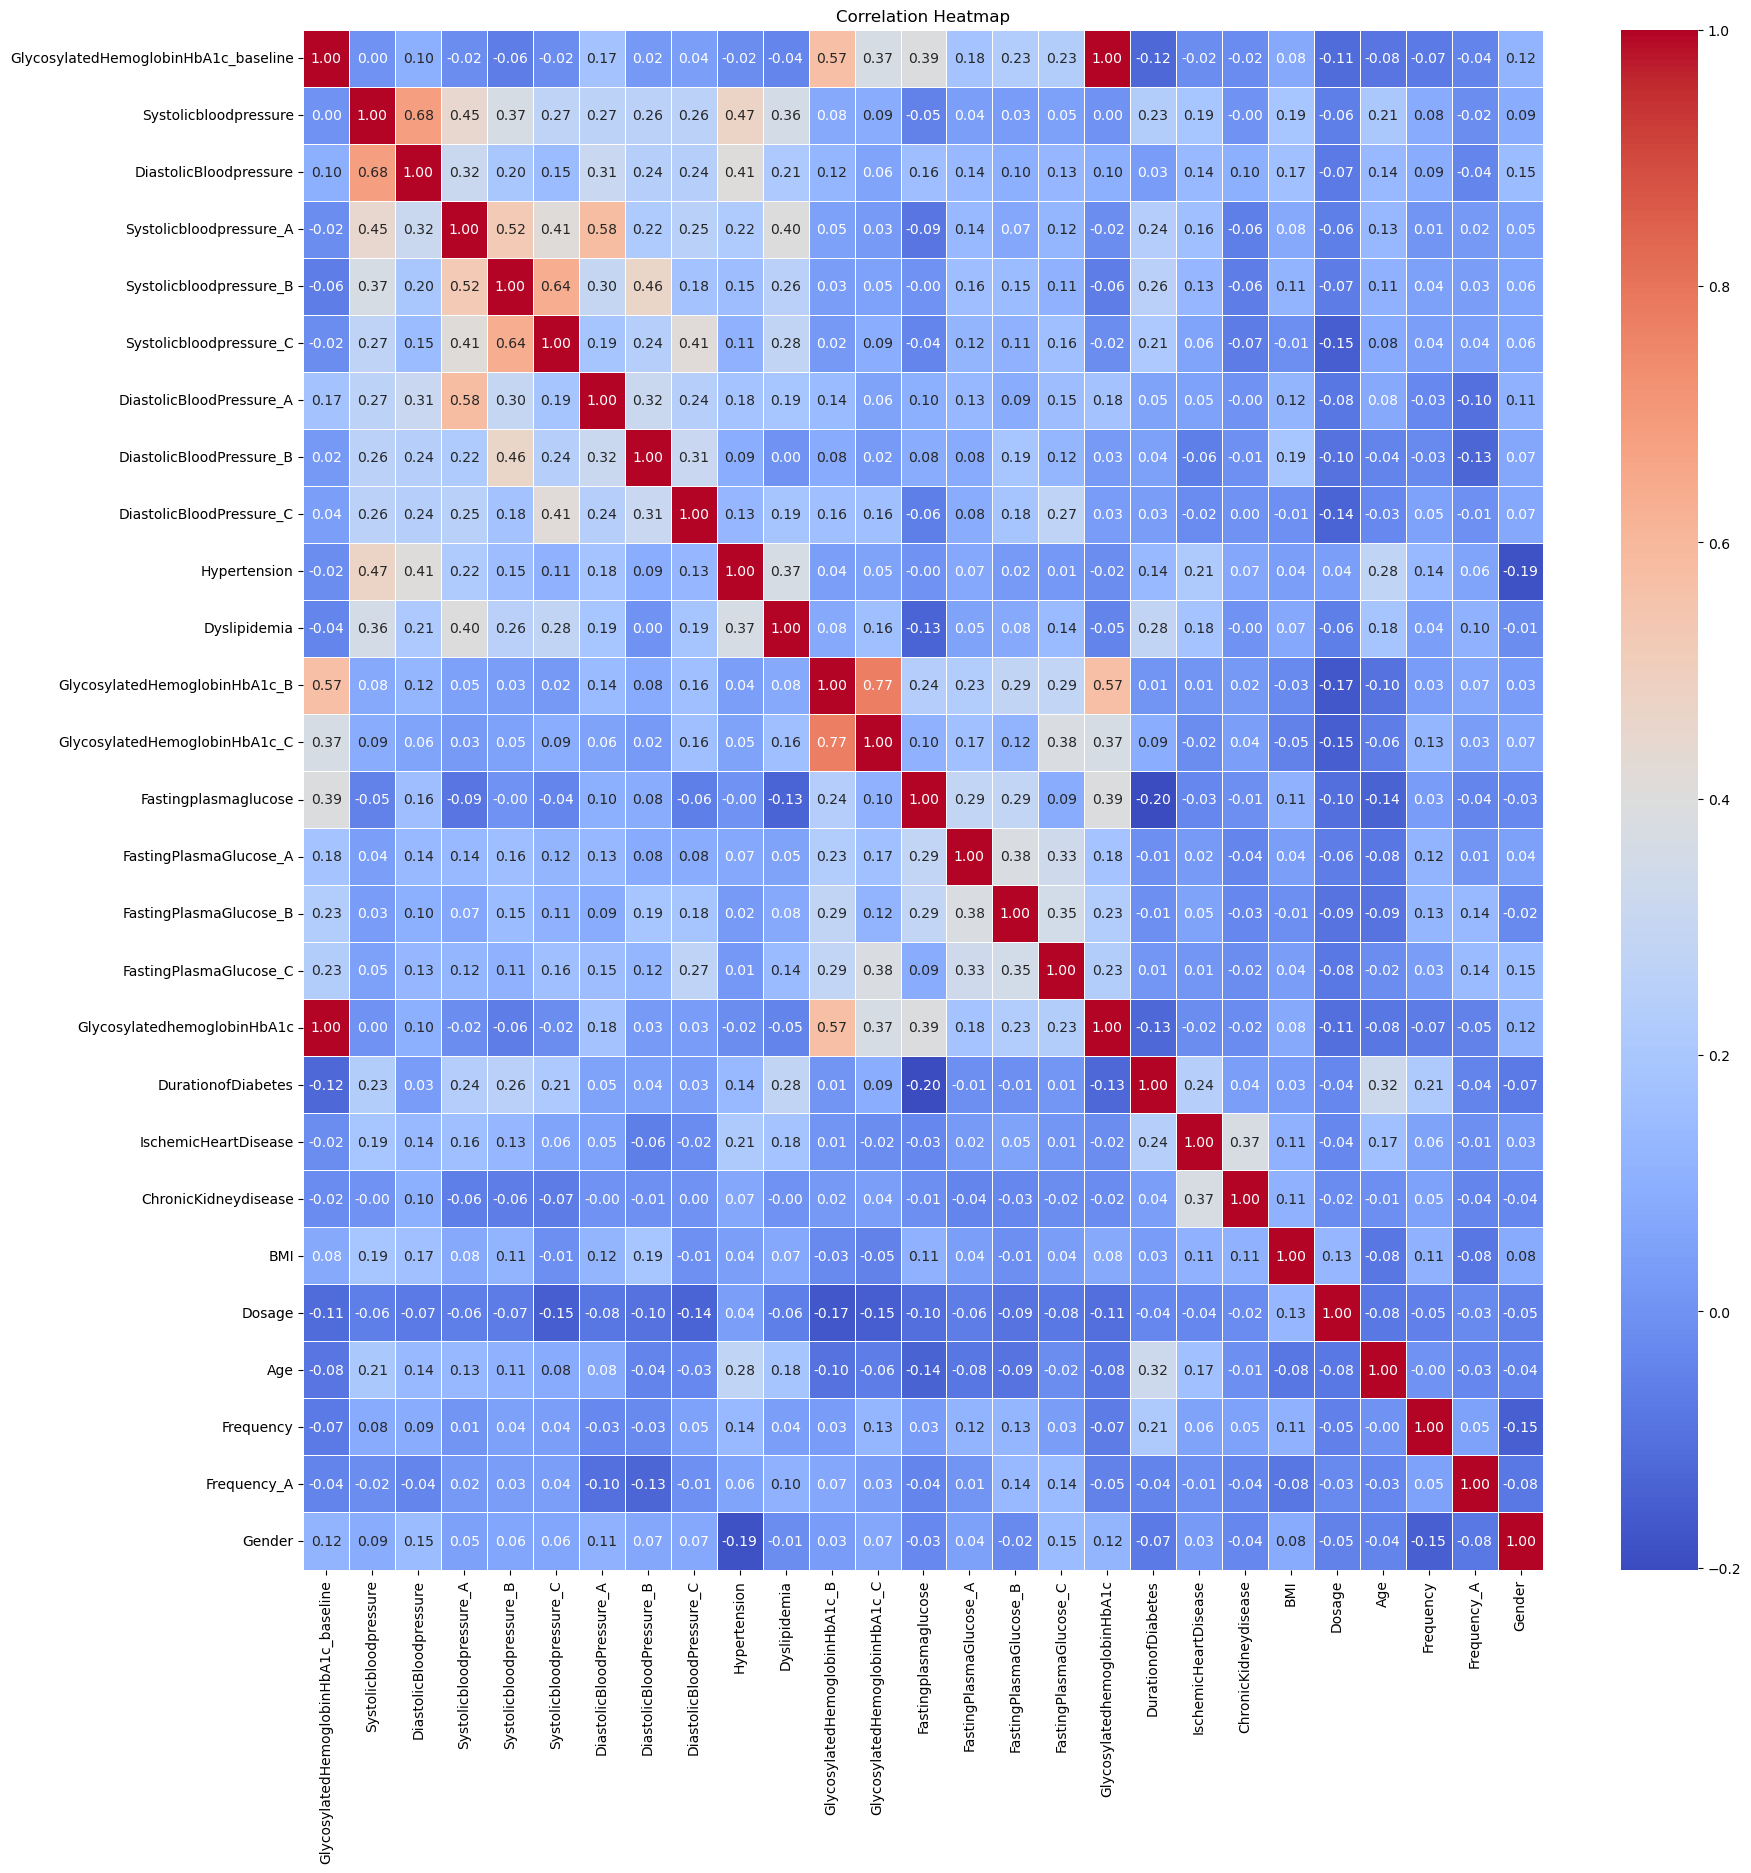

In [19]:
#Computing the correlation matrix for the selected_data
correlation_matrix = selected_data.corr()

#plotting the heatmap
plt.figure(figsize=(20, 20))              #setting the size of the map
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) #generating the heatmap with annotations
plt.title('Correlation Heatmap')         #setting title for the heatmap
plt.show()                               #displaying the heatmap 

##### Feature Importance

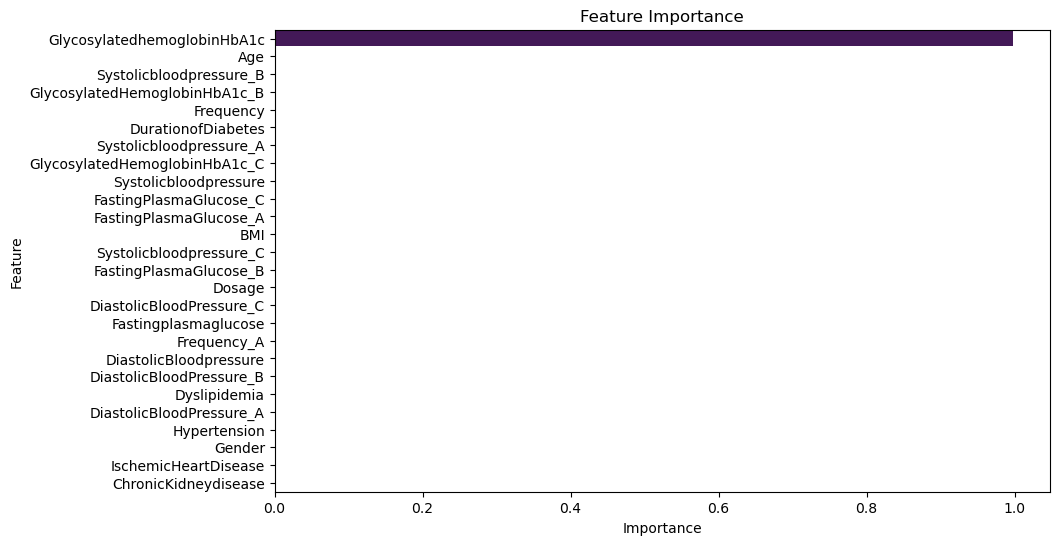

In [20]:
#Finding the feature importance of input features with target variable using barplot

from sklearn.ensemble import RandomForestRegressor   #importing 'RandomForestRegressor' from scikit-learn

#selecting the input features from above defined selected columns
selected_columns1 = ['Systolicbloodpressure', 'DiastolicBloodpressure', 'Systolicbloodpressure_A', 'Systolicbloodpressure_B', 'Systolicbloodpressure_C', 'DiastolicBloodPressure_A', 'DiastolicBloodPressure_B', 'DiastolicBloodPressure_C', 'Hypertension', 'Dyslipidemia', 'GlycosylatedHemoglobinHbA1c_B', 'GlycosylatedHemoglobinHbA1c_C', 'Fastingplasmaglucose', 'FastingPlasmaGlucose_A', 'FastingPlasmaGlucose_B', 'FastingPlasmaGlucose_C', 'GlycosylatedhemoglobinHbA1c', 'DurationofDiabetes', 'IschemicHeartDisease', 'ChronicKidneydisease', 'BMI', 'Dosage', 'Age', 'Frequency', 'Frequency_A', 'Gender']

X = ptsdata_normalized[selected_columns1]   #assigning the input features from above selected_columns1 to 'X'
y = ptsdata_normalized['GlycosylatedHemoglobinHbA1c_baseline']  #selecting output feature(y) from selected_columns1

#initializing a random forest regressor with 100 trees and a random seed of 42
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X, y)                     #fitting the regressor to the data

feature_importances = rf.feature_importances_     #extracting feature importances from the trained model

#creating a dataFrame- 'importance_df' to store feature importances and sorting it by "importance"
importance_df = pd.DataFrame({'Feature': selected_columns1, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#plotting feature importances using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=False), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

##### Data Splitting:

In [21]:
#Splitting the data into training & testing sets and printing their results

from sklearn.model_selection import train_test_split       #importing train_test_split function from scikit-learn

#split the data into training and testing sets with 80% for training and 20% for testing and setting the random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape of dataset1:", X_train.shape)    #printing shape of training features
print("Testing set shape of dataset1:", X_test.shape)      #printing shape of testing features

Training set shape of dataset1: (192, 26)
Testing set shape of dataset1: (48, 26)


### 3.4 Implementing traditional machine learning techniques on dataset-1

#### 3.4.1 Selection of Machine Learning models

##### Decision tree Regression:


In [22]:
#Evaluating the testing and training sets using "Decision tree Regression" model and printing the results

from sklearn.tree import DecisionTreeRegressor     #importing DecisionTreeRegressor from scikit-learn

#initializing the Decision Tree model with a random state=42 for reproducibility
decisiontree_reg = DecisionTreeRegressor(random_state=42)   

decisiontree_reg.fit(X_train, y_train)             #training the Decision Tree model on the training data
y_pred_tree = decisiontree_reg.predict(X_test)     #predicting the test data using above trained Decision tree Regression model

#evaluating the performance of the Decision Tree model
mseDR = mean_squared_error(y_test, y_pred_tree)    #calculating Mean Squared Error
maeDR = mean_absolute_error(y_test, y_pred_tree)   #calculating Mean Absolute Error
rmseDR = np.sqrt(mseDR)                            #calculating Root Mean Squared Error     
r2_score_DR = r2_score(y_test, y_pred_tree)        #calculating R-squared (R^2) Score    

#printing the above calculated evaluation metrics for the Decision Tree model
print("Decision Tree Regression:")
print("Mean Squared Error:", mseDR)
print("Mean Absolute Error:", maeDR)
print("Root Mean Squared Error:", rmseDR)
print("R-squared (R^2) Score:", r2_score_DR)

Decision Tree Regression:
Mean Squared Error: 0.00011574074074074117
Mean Absolute Error: 0.0020833333333333446
Root Mean Squared Error: 0.0107582870727984
R-squared (R^2) Score: 0.9987124394444176


##### Support Vector Machine (SVM) algorithm

In [23]:
#Evaluating the testing and training sets using "Support Vector Machine (SVM)" algorithm and printing the results

from sklearn.svm import SVR                         #importing SVR from sklearn.svm

random.seed(42)                                     #setting random seed for Python's random number generator
np.random.seed(42)                                  #setting random seed for NumPy
tf.random.set_seed(42)                              #setting random seed for TensorFlow

svm_reg = SVR()                                     #initializing the SVM model 
svm_reg.fit(X_train, y_train)                       #training the SVM model on the training data
y_pred_svm = svm_reg.predict(X_test)                #predicting the test data using above trained SVM model

#evaluating the performance of the SVM model
mseSVM = mean_squared_error(y_test, y_pred_svm)     #calculating Mean Squared Error
maeSVM = mean_absolute_error(y_test, y_pred_svm)    #calculating Mean Absolute Error
rmseSVM = np.sqrt(mseSVM)                           #calculating Root Mean Squared Error
r2_score_SVM = r2_score(y_test, y_pred_svm)         #calculating R-squared (R^2) Score

#printing the above calculated evaluation metrics for the Support Vector Machine (SVM) model
print("Support Vector Machine (SVM) Regression:")
print("Mean Squared Error:", mseSVM)
print("Mean Absolute Error:", maeSVM)
print("Root Mean Squared Error:", rmseSVM)
print("R-squared (R^2) Score:", r2_score_SVM)

Support Vector Machine (SVM) Regression:
Mean Squared Error: 0.010342913725399873
Mean Absolute Error: 0.0715444446038077
Root Mean Squared Error: 0.10170011664398361
R-squared (R^2) Score: 0.8849400163037937


##### K-Nearest Neighbors (KNN) model

In [24]:
#Evaluating the testing and training sets using "K-Nearest Neighbors (KNN)" model and printing the results

from sklearn.neighbors import KNeighborsRegressor      #importing KNeighborsRegressor from sklearn.neighbors

random.seed(42)                                        #setting random seed for Python's random number generator
np.random.seed(42)                                     #setting random seed for NumPy 
tf.random.set_seed(42)                                 #setting random seed for TensorFlow

knn_reg = KNeighborsRegressor()                        #initializing the KNN model 
knn_reg.fit(X_train, y_train)                          #training the KNN model on the training data
y_pred_knn = knn_reg.predict(X_test)                   #predicting the test data using above trained KNN model

#evaluating the performance of the KNN model
mseKNN = mean_squared_error(y_test, y_pred_knn)        #calculating Mean Squared Error
maeKNN = mean_absolute_error(y_test, y_pred_knn)       #calculating Mean Absolute Error
rmseKNN = np.sqrt(mseKNN)                              #calculating Root Mean Squared Error
r2_score_KNN = r2_score(y_test, y_pred_knn)            #calculating R-squared (R^2) Score

#printing the above calculated evaluation metrics for the K-Nearest Neighbors (KNN) model
print("K-Nearest Neighbors (KNN) Regression:")
print("Mean Squared Error:", mseKNN)
print("Mean Absolute Error:", maeKNN)
print("Root Mean Squared Error:", rmseKNN)
print("R-squared (R^2) Score:", r2_score_KNN)

K-Nearest Neighbors (KNN) Regression:
Mean Squared Error: 0.0442527777777778
Mean Absolute Error: 0.16791666666666671
Root Mean Squared Error: 0.21036344211335248
R-squared (R^2) Score: 0.5077089469364106


##### Artificial Neural Networks (ANN) regression

In [25]:
#Evaluating the testing and training sets using "Artificial Neural Networks (ANN) regression" model and printing the results

from keras.models import Sequential                  #importing Sequential from keras.models
from keras.layers import Dense                       #importing Dense from keras.layers

random.seed(42)                                      #setting random seed for Python's random number generator
np.random.seed(42)                                   #setting random seed for NumPy
tf.random.set_seed(42)                               #setting random seed for TensorFlow
   
ann_model = Sequential()                             #initializing the ANN model as a sequential model

#adding input layer and one hidden layer with 10 neurons and ReLU activation function
ann_model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))

#adding output layer with 1 neuron (for regression) and linear activation function
ann_model.add(Dense(1, activation='linear'))

#compiling the ANN model with mean squared error loss function and Adam optimizer
ann_model.compile(loss='mean_squared_error', optimizer='adam')

#training the ANN model on the training data with 100 epochs, batch size of 32, and 20% validation split
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

y_pred_ann = ann_model.predict(X_test).flatten()       #predicting the test data using above trained ANN model

#evaluating the performance of the ANN model
mseANN = mean_squared_error(y_test, y_pred_ann)        #calculating Mean Squared Error
maeANN = mean_absolute_error(y_test, y_pred_ann)       #calculating Mean Absolute Error
rmseANN = np.sqrt(mseANN)                              #calculating Root Mean Squared Error
r2_score_ANN = r2_score(y_test, y_pred_ann)            #calculating R-squared (R^2) Score

#printing the above calculated evaluation metrics for the Artificial Neural Networks (ANN) regression model
print("Artificial Neural Networks (ANN) Regression:")
print("Mean Squared Error:", mseANN)
print("Mean Absolute Error:", maeANN)
print("Root Mean Squared Error:", rmseANN)
print("R-squared (R^2) Score:", r2_score_ANN)

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Artificial Neural Networks (ANN) Regression:
Mean Squared Error: 0.01652181951347238
Mean Absolute Error: 0.09889489565717262
Root Mean Squared Error: 0.12853723006768264
R-squared (R^2) Score: 0.8162026355123347


#### 3.4.2 Implementing Deep learning with attention mechanism technique on dataset-1

In [26]:
#Evaluating the testing and training sets using "Deep learning with attention mechanism" technique and printing the results

#importing necessary libraries and modules
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Conv1D, MaxPooling1D, Flatten
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, RegressorMixin

random.seed(42)                                           #setting random seed for Python's random number generator
np.random.seed(42)                                        #setting random seed for NumPy
tf.random.set_seed(42)                                    #setting random seed for TensorFlow

#reshaping the input data for LSTM model
X_train_lstm_reshaped = np.expand_dims(X_train, axis=-1).reshape(X_train.shape[0], -1)
X_test_lstm_reshaped = np.expand_dims(X_test, axis=-1).reshape(X_test.shape[0], -1)

#defining the function to create LSTM model
def create_lstm_model(units=100, dropout=0.2, input_shape=(X_train_lstm_reshaped.shape[1], 1)):
    model = Sequential([
        Bidirectional(LSTM(units, return_sequences=True), input_shape=input_shape),
        Dropout(dropout),
        Conv1D(filters=64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#creating custom 'KerasRegressor' class
class CustomKerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, units=100, dropout=0.2, input_shape=(X_train_lstm_reshaped.shape[1], 1)):
        self.units = units
        self.dropout = dropout
        self.input_shape = input_shape
        self.model = None
        
    def fit(self, X, y):
        self.model = create_lstm_model(units=self.units, dropout=self.dropout, input_shape=self.input_shape)
        self.model.fit(X, y, epochs=30, batch_size=32, verbose=0)
        return self
    
    def predict(self, X):
        return self.model.predict(X)

#defining the parameter grid for grid search
param_grid = {
    'model__units': [50, 100],
    'model__dropout': [0.2, 0.3]
}

#creating pipeline with preprocessing and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', CustomKerasRegressor())
])

#performing grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', refit=True, verbose=1)
grid_search.fit(X_train_lstm_reshaped, y_train)

#getting the best model from grid search
best_model = grid_search.best_estimator_

#evaluating the performance of the Deep learning with attention mechanism technique
y_pred = best_model.predict(X_test_lstm_reshaped)            #predicting the reshaped test data using above defined 'best_model'
mse = mean_squared_error(y_test, y_pred)                     #calculating Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)                    #calculating Mean Absolute Error
rmse = np.sqrt(mse)                                          #calculating Root Mean Squared Error
r2 = r2_score(y_test, y_pred)                                #calculating R-squared (R^2) Score

#printing the above calculated evaluation metrics for the Deep learning with attention mechanism technique
print("Deep learning with attention mechanism metrics:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("R-squared (R^2) Score:", r2)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step   


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step
Deep learning with attention mechanism metrics: {'model__dropout': 0.2, 'model__units': 50}
Mean Squared Error: 0.010883093374839605
Mean Absolute Error: 0.08296088686005941
Root Mean Squared Error: 0.10432206561815964
R-squared (R^2) Score: 0.8789307752613083


#### Interpretability Analysis on selected features for dataset-1

C:\Anaconda3\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
PermutationExplainer explainer: 49it [02:18,  2.94s/it]                        


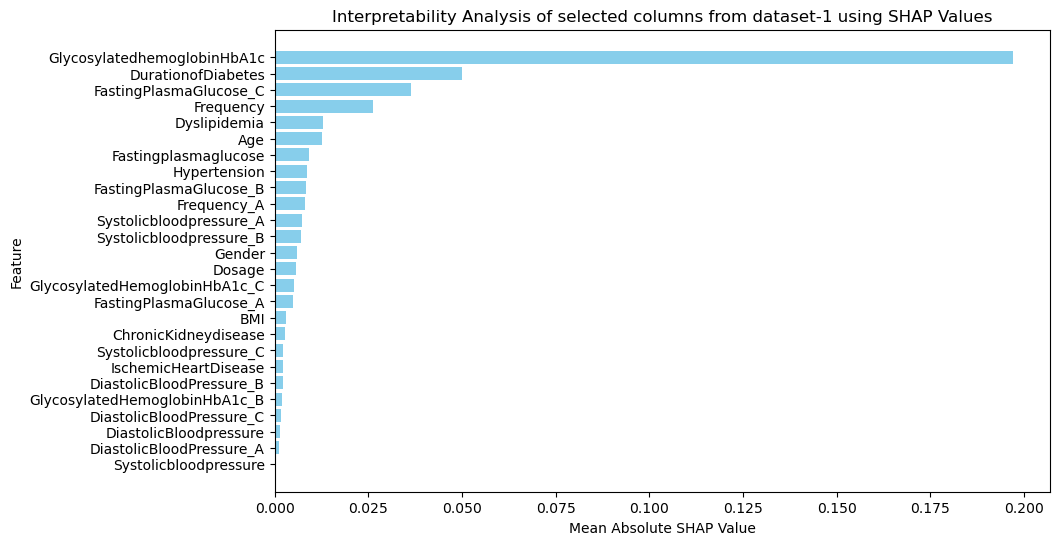

In [27]:
#Performing interpretability analysis using "SHAP" on selected input features and plotting their importance using barplot

import shap                                       #importing SHAP library
best_model = grid_search.best_estimator_          #extracting the best model from the pipeline obtained from grid search
keras_model = create_lstm_model()                 #re-creating the TensorFlow Keras model using the original configuration

#training the Keras model on the entire dataset
keras_model.fit(X_train_lstm_reshaped, y_train, epochs=30, batch_size=32, verbose=0)

#creating the SHAP explainer using the trained Keras model and reshaped training dataset
explainer = shap.Explainer(keras_model, X_train_lstm_reshaped)

shap_values = explainer.shap_values(X_test_lstm_reshaped)    #computing SHAP values for the test dataset
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)  #computing mean absolute SHAP values across samples

#sorting feature importances by mean absolute SHAP values
sorted_idx = np.argsort(mean_abs_shap_values)
features_sorted = X.columns[sorted_idx]
shap_values_sorted = mean_abs_shap_values[sorted_idx]

#plotting feature importances using horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(features_sorted, shap_values_sorted, color='skyblue')
plt.xlabel('Mean Absolute SHAP Value')
plt.ylabel('Feature')
plt.title('Interpretability Analysis of selected columns from dataset-1 using SHAP Values')
plt.show()

### Implementing Deep learning with attention mechanism technique on PIMA Indian diabetes dataset to compare model performance with traditional machine learning methods

In [28]:
#Loading the csv data - PIMA dataset using pandas library and printing the first 10 rows from pandas dataframe
pima_data = pd.read_csv('Dataset 1 _ Pima Indians diabetes dataset (PIDD).csv')
pima_data.head(10)

,Pregnancies,Glucose,Blood pressure,Skin thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [29]:
#Finding the sum of missing values of the columns with datatypes
missing_values = pima_data.isnull().sum()         #summing the no.of null values present for each column
missing_values                                    #pritning the missing values

Pregnancies                   0
Glucose                       0
Blood pressure                0
Skin thickness                0
Insulin                       0
Body mass index               0
Diabetes pedigree function    0
Age                           0
Outcome                       0
dtype: int64

In [30]:
#Retrieving column names of the PIMA Indian Diabetes dataset and converting them into a list
pima_data.columns.tolist()

['Pregnancies',
 'Glucose',
 'Blood pressure',
 'Skin thickness',
 'Insulin',
 'Body mass index',
 'Diabetes pedigree function',
 'Age',
 'Outcome']

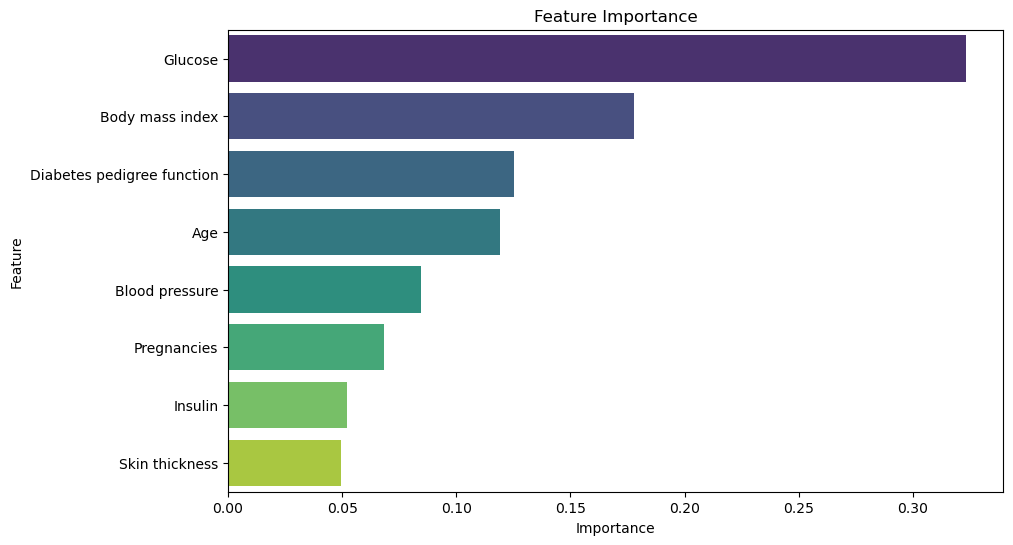

In [31]:
#Selecting columns from pima_data df to evaluate model performances and finding the feature importance with target variable

#assigning the above list of columns to 'selected_columns2'
selected_columns2 = ['Pregnancies','Glucose','Blood pressure','Skin thickness','Insulin','Body mass index','Diabetes pedigree function','Age']

X1 = pima_data[selected_columns2]  #assigning the input features from above selected_columns2 to 'X1'
y1 = pima_data['Outcome']  #selecting output feature(y1) from selected_columns2

#initializing a random forest regressor(rf1) with 100 trees and a random seed of 42
rf1 = RandomForestRegressor(n_estimators=100, random_state=42)

rf1.fit(X1, y1)                         #fitting the regressor(rf1) to the input and output features
feature_importances1 = rf1.feature_importances_     #extracting feature importances from the trained model

#creating a dataFrame- 'importance_df1' to store feature importances and sorting it by "importance"
importance_df1 = pd.DataFrame({'Feature': selected_columns2, 'Importance': feature_importances1})
importance_df1 = importance_df1.sort_values(by='Importance', ascending=False)

#plotting feature importances using a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df1.sort_values(by='Importance', ascending=False), palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [32]:
#Splitting the data into training & testing sets and printing their results

#split the data into training and testing sets with 80% for training and 20% for testing and setting the random_state=42
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print("Training set shape of PIMA Indian dataset:", X1_train.shape)        #printing shape of training features
print("Testing set shape of PIMA Indian dataset:", X1_test.shape)          #printing shape of testing features

Training set shape of PIMA Indian dataset: (614, 8)
Testing set shape of PIMA Indian dataset: (154, 8)


#### Deep learning with attention mechanism on PIMA dataset

In [33]:
#Evaluating the testing and training sets using "Deep learning with attention mechanism" technique and printing the results

#importing necessary libraries and modules
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, Attention, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

#standardizing input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X1_train)
X_test_scaled = scaler.transform(X1_test)

random.seed(42)                                            #setting random seed for Python's random number generator
np.random.seed(42)                                         #setting random seed for NumPy
tf.random.set_seed(42)                                     #setting random seed for TensorFlow

#reshaping the input data for LSTM model
X1_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X1_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

input_shape = (X1_train_lstm.shape[1], X1_train_lstm.shape[2])  #defining the input shape for the LSTM model
inputs = Input(shape=input_shape)                               #defining the input layer

#adding multiple LSTM layers with increasing number of units
lstm_output1 = LSTM(128, return_sequences=True)(inputs)
lstm_output2 = LSTM(64, return_sequences=True)(lstm_output1)
lstm_output3 = LSTM(32, return_sequences=True)(lstm_output2)

#using the output of LSTM as both query and value for attention mechanism
attention_output = Attention()([lstm_output3, lstm_output3])


dropout_output = Dropout(0.5)(attention_output)            #applying Dropout regularization to prevent overfitting
batch_norm_output = BatchNormalization()(dropout_output)   #applying batch normalization for faster convergence
flatten_output = Flatten()(batch_norm_output)              #flatten the output of attention layer
outputs = Dense(1, activation='sigmoid')(flatten_output)   #adding output layer with sigmoid activation for binary classification
dl_model = Model(inputs=inputs, outputs=outputs)           #creating the deep learning model

#compiling the model with binary crossentropy loss and Adam optimizer with learning rate scheduling
optimizer = Adam(learning_rate=0.001)
dl_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

#defining learning rate reduction callback
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=1, factor=0.2, min_lr=0.0001)

#training the model with more epochs and batch size of 32, using 20% validation split and learning rate reduction callback
dl_model.fit(X1_train_lstm, y1_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_reduction])


y_pred_dl = dl_model.predict(X1_test_lstm).flatten()  #predicting the test data using above defined dl model
y_pred_binary = (y_pred_dl > 0.5).astype(int)      #converting predicted probabilities to binary values (0 or 1) using threshold of 0.5
loss, accuracy = dl_model.evaluate(X1_test_lstm, y1_test)  #evaluating the model on the testing set

#printing the accuracy of the deep learning model
print("Deep learning with attention mechanism Accuracy for PIMA indian dataset:", accuracy)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.7025 - loss: 0.6128 - val_accuracy: 0.6098 - val_loss: 0.6784 - learning_rate: 0.0010
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7233 - loss: 0.5954 - val_accuracy: 0.6098 - val_loss: 0.6689 - learning_rate: 0.0010
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7072 - loss: 0.5762 - val_accuracy: 0.6098 - val_loss: 0.6634 - learning_rate: 0.0010
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7246 - loss: 0.5537 - val_accuracy: 0.6098 - val_loss: 0.6614 - learning_rate: 0.0010
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7768 - loss: 0.5359 - val_accuracy: 0.6098 - val_loss: 0.6607 - learning_rate: 0.0010
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7519 - loss: 0.5304 - val_accuracy: 0.6098 - val_loss: 0.6626 - learning_rate: 0.0010
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7504 - loss: 0.5304 - val_acc

#### Traditional machine learning techniques for dataset-2

In [34]:
#Evaluating the Traditional machine learning model performances on dataset-2

#importing necessary classifiers and metrics from scikit-learn
from sklearn.linear_model import LogisticRegression        
from sklearn.tree import DecisionTreeClassifier            
from sklearn.svm import SVC                                 
from sklearn.neural_network import MLPClassifier            
from sklearn.neighbors import KNeighborsClassifier          
from sklearn.metrics import accuracy_score

#Performing Logistic Regression 
lr_model = LogisticRegression()                           #initializing Logistic Regression model
lr_model.fit(X_train_scaled, y1_train)                    #training the model 
lr_y_pred = lr_model.predict(X_test_scaled)               #predicting the above model on test data
lr_accuracy = accuracy_score(y1_test, lr_y_pred)          #calculating accuracy
print("Logistic Regression Accuracy:", lr_accuracy)       #printing accuracy of Logistic Regression model

#Performing Decision Tree
dt_model = DecisionTreeClassifier()                       #initializing Decision Tree model
dt_model.fit(X_train_scaled, y1_train)                    #training the model
dt_y_pred = dt_model.predict(X_test_scaled)               #predicting the above model on test data
dt_accuracy = accuracy_score(y1_test, dt_y_pred)          #calculating accuracy
print("Decision Tree Accuracy:", dt_accuracy)             #printing accuracy of Decision Tree model

#Performing Support Vector Machine (SVM)
svm_model = SVC()                                          #initializing SVM model
svm_model.fit(X_train_scaled, y1_train)                    #training the model
svm_y_pred = svm_model.predict(X_test_scaled)              #predicting the above model on test data
svm_accuracy = accuracy_score(y1_test, svm_y_pred)         #calculating accuracy
print("Support Vector Machine Accuracy:", svm_accuracy)    #printing accuracy of SVM model

#Performing Artificial Neural Network (ANN)
ann_model = MLPClassifier(max_iter=1000)                   #initializing ANN model
ann_model.fit(X_train_scaled, y1_train)                    #training the model
ann_y_pred = ann_model.predict(X_test_scaled)              #predicting the above model on test data
ann_accuracy = accuracy_score(y1_test, ann_y_pred)         #calculating accuracy
print("Artificial Neural Network Accuracy:", ann_accuracy) #printing accuracy of ANN model

#Performing K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()                         #initializing KNN model
knn_model.fit(X_train_scaled, y1_train)                    #training the model
knn_y_pred = knn_model.predict(X_test_scaled)              #predicting the above model on test data
knn_accuracy = accuracy_score(y1_test, knn_y_pred)         #calculating accuracy
print("K-Nearest Neighbors Accuracy:", knn_accuracy)       #printing accuracy of KNN model

Logistic Regression Accuracy: 0.7532467532467533
Decision Tree Accuracy: 0.7467532467532467
Support Vector Machine Accuracy: 0.7337662337662337
Artificial Neural Network Accuracy: 0.7272727272727273
K-Nearest Neighbors Accuracy: 0.6948051948051948
